<img src='https://drive.google.com/uc?export=view&id=1EQFcwVUi0mrPqUC2NAJM3fIeXkOfgnVS' width="240" height="240" align="center"/>

# Calculo de probabilidad de que Clientes bancarios realizen Depositos a Plazo
#### Integrantes del proyecto: Juan Cassinerio - Juan Isasi - Jose Vargas 
### Contenido:

- 1. Introducción
- 2. Dataset y Analisis de Variables 
  - 2.1  Objetivos 
- 3. Desarrollo del Modelo
- 4. Conlusiones

## 1. **Introduccion**

***Contexto empresarial***
Dentro de los productos y servicios que ofrecen los bancos, los depositos a plazo representan un gran porcentaje de las fuentes de ingresos. Para poder maximizar la cantidad de depositos a plazo realizados, se buscara identificar a los clientes (parametros) que tengan la mayor probabilidad de subscribirse a este tipo de producto y de esa manera poder mejorar los esfuerzos de marketing en dichos clientes.

***Problema empresarial***:
Se recopilo un conjuntos de datos con el objetivo de desarrollar modelos de predicción para clasificar la probabilidad de que clientes realizen depositos a plazo en bancos. Estos datos fueron tomados de un una campaña de marketing de una importante institucion bancaria de Portugal. 

***Contexto analitico***:
Se nos permitio el acceso a un .cvs donde emplearemos un analisis descritivo para poder entender de mejor forma los datos recopilados y su relacion con la variable a investigar "y" (Si el deposito a plazo fue realizado o no).

Dataset: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification).



## 2. **Dataset y Analisis de Variables:**

Este analisis servira para verificar si una persona sera propensa a realizar un depósito a plazo. La variable **output** a predecir es **y** donde 1: se subscribio 0: no se subscribio. Para ello se cuenta con las siguientes variables **input** :

<table >
<thead>
  <tr>
    <th>#</th>
    <th>Variable</th>
    <th>Concepto</th>
  </tr>
</thead>
<tbody>
    <tr>
        <th>1</th>
        <td>age</td>
        <td>edad del cliente</td>
    </tr>
    <tr>
        <th>2</th>
        <td>job</td>
        <td>profesion ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: estado civil </td>    
    </tr>
    <tr>
        <th>3</th>
        <td>marital</td>
        <td>estado civil </td>    
    </tr>
    <tr>
        <th>4</th>
        <td>education</td>
        <td>formacion academica ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')</td>      
    </tr>
    <tr>
        <th>5</th>
        <td>default</td>
        <td>si posee credito defaulteado ('no','yes','unknown')</td>   
    </tr>
    <tr>
        <th>6</th>
      <td>housing</td>
      <td>si posee credito inmobiliario ('no','yes','unknown')</td>  
    </tr>
    <tr>
        <th>7</th>
      <td>loan</td>
      <td>si posee un credito personal ('no','yes','unknown')</td> 
    </tr>
    <tr>
        <th>8</th>
      <td>contact</td>
      <td>metodo de contacto ('cellular','telephone')</td>   
    </tr>
    <tr>
        <th>9</th>
      <td>month</td>
      <td>ultimo mes de contacto realizado al cliente durante la campaña de marketing ('jan', 'feb', 'mar', …, 'nov', 'dec')</td>   
    </tr>
    <tr>
        <th>10</th>
      <td>day_of_week</td>
      <td>ultimo contacto de la semana ('mon','tue','wed','thu','fri')</td>   
    </tr>
    <tr>
        <th>11</th>
      <td>duration</td>
      <td>duracion del ultimo contacto en dicha llamada, en segundos</td> 
    </tr>
    <tr>
        <th>12</th>
      <td>campaign</td>
      <td>numero de contactos realizados durante esta ultima campaña</td>    
    </tr>
    <tr>
        <th>13</th>
      <td>pdays</td>
      <td>numero de dias que pasaron desde la ultima vez que fue contactado (999 means client was not previously contacted)</td>
        <td></td>
    </tr>
    <tr>
        <th>14</th>
      <td>previous</td>
      <td>numero de contactos realizados a este cliente antes de la presente campaña</td> 
    </tr>
    <tr>
        <th>15</th>
      <td>poutcome</td>
      <td>resultado de la campaña ('failure','nonexistent','success')</td>  
    </tr>    
</tbody>
</table>

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"juancassinerio","key":"ee2a3a972b854867bb5278dd0b0aa8f1"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rashmiranu/banking-dataset-classification
!unzip /content/banking-dataset-classification

  0% 0.00/409k [00:00<?, ?B/s]
100% 409k/409k [00:00<00:00, 100MB/s]
Archive:  /content/banking-dataset-classification.zip
  inflating: new_test.csv            
  inflating: new_train.csv           


In [ ]:
import pandas as pd
df=pd.read_csv('new_train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
# Remover valores duplicados
df = df.drop_duplicates()

In [ ]:
# Remover filas con valores NaN
df = df.dropna()

## 2.1 **Objetivos**

Las siguientes son las preguntas a responder a partir del conocimiento de los datos:

- 1) Relacion entre estado civil del cliente y Prababiliadad de realizar depositos a plazo
- 2) Meses en que los clientes son mas predispuetsos a realizar depositos a plazo
- 3) Relacion entre edad del cliente y duracion del ultimo contacto con el mismo con la Probabilidad que este realize un deposito a plazo

### 2.1.1 **Relacion entre estado civil del cliente y Probabiliadad de realizar depositos a plazo**

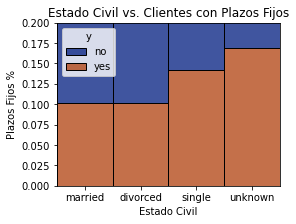

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby("marital").sum()
plt.figure(figsize=(4,3))
plt.title("Estado Civil vs. Clientes con Plazos Fijos")
plt.xlabel('Estado Civil')
plt.ylabel('Plazos Fijos %')
plt.ylim(0,0.2)
sns.histplot(data=df,x='marital',hue='y',palette = "dark",multiple="fill")
plt.savefig("image1.png", dpi=150, bbox_inches='tight')

Se observa que predominan los depositos a plazo en clientes Solteros con un 15%, mientras que las personas casadas muestran un 10%, un 33% menor. Igualmente cabe resaltar que se desconoce el estado civil del 17% de las muestras.

### 2.1.2 **Meses en que los clientes son mas predispuetsos a realizar depositos a plazo**

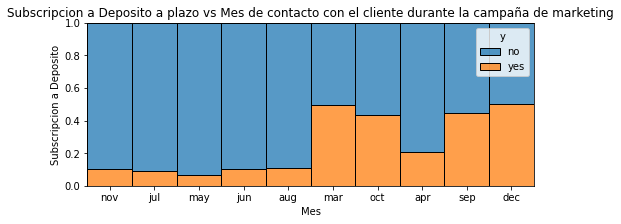

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,3))
plt.title("Subscripcion a Deposito a plazo vs Mes de contacto con el cliente durante la campaña de marketing")
plt.xlabel('Mes')
plt.ylabel('Subscripcion a Deposito')
sns.histplot(data=df,x="month", hue="y",multiple="fill",discrete=True, shrink=1)
plt.show()
plt.savefig("image2.png", dpi=150, bbox_inches='tight')

Podemos observar que los meses de Marzo, Octubre, Septiembre y Diciembre tuvieron un ratio sobresaliente de Subscripciones a Depositos a Plazo, un 200% mayor en promedio que el resto de meses.

### 2.1.3 **Relacion entre edad del cliente y duracion del ultimo contacto con el mismo con la Probabilidad que este efectue un deposito a plazo**

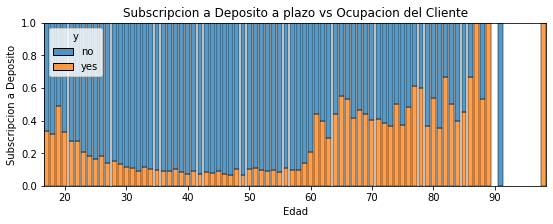

<Figure size 432x288 with 0 Axes>

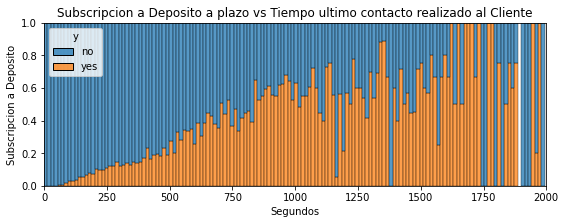

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,3))
plt.title("Subscripcion a Deposito a plazo vs Ocupacion del Cliente")
plt.xlabel('Edad')
plt.ylabel('Subscripcion a Deposito')
sns.histplot(data=df,x="age", hue="y",multiple="fill",discrete=True, shrink=.8)
plt.show()
plt.savefig("image3.png", dpi=150, bbox_inches='tight')

plt.figure(figsize=(9,3))
plt.title("Subscripcion a Deposito a plazo vs Tiempo ultimo contacto realizado al Cliente")
plt.xlabel('Segundos')
plt.ylabel('Subscripcion a Deposito')
plt.xlim(0,2000)
sns.histplot(data=df,x='duration',hue='y',multiple="fill")
plt.show()
plt.savefig("image4.png", dpi=150, bbox_inches='tight')

De la primera grafica podemos observar que los clientes con edad menor a 25 años y mayor a 60 años son mas proclives a realizar depósitos a plazo.

De la segunda grafica se puede apreciar que las llamadas a clientes con duracion menor a 100 segundos no concretaron con la realizacion de depositos. Por otro lado aquellas con una duracion entre 760 segundos (12min) o mas tuvieron mas de un 50% de concretar en depositos. Parece haber una correlacion directa entre el ratio de subscripcion y la duracion de la llamada con el cliente.

## 3. **Desarrollo del Modelo**

A continuacion realizamos 3 metodos de machine learning (**Regresion Logistica, Decision Tree y Random Forest**) y evaluamos su habilidad para predecir la predisposición de clientes a realizar depositos a plazo en relacion de las variables previamente analizadas.

In [ ]:
# Preparacion de Variables
dummy_month = pd.get_dummies(df["month"], prefix="month")
dummy_marital = pd.get_dummies(df["marital"], prefix="marital")

df1 = df.drop(['job','education','default','housing','loan','contact','day_of_week','campaign','pdays','previous','poutcome'], axis=1)
df2 = df1.drop(["month"], axis=1)
df3 = df2.drop(["marital"], axis=1)
df3 = pd.concat([df3, dummy_month, dummy_marital], axis=1)
df4 = df3.replace('yes',1)
df5 = df4.replace('no',0)
df6 = df5.drop(['y'], axis=1)

In [ ]:
pip install mlxtend

### 3.1 **Modelo por Regresion Logistica**

accuracy_score = 0.9066626195173775
f1_score = 0.39882697947214074
recall_score = 0.2901849217638691
precision_score = 0.6375

 classification_report               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5886
           1       0.64      0.29      0.40       703

    accuracy                           0.91      6589
   macro avg       0.78      0.64      0.67      6589
weighted avg       0.89      0.91      0.89      6589



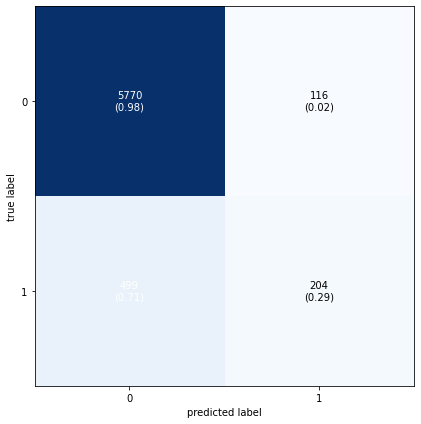

In [ ]:
# Creacion de conjuntos de entrenamiento, Escalado y Modelo de Regresion Logistica
from sklearn.model_selection import train_test_split
x = df6.iloc[:,:15]
y = df5.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,recall_score,precision_score

print('accuracy_score =',accuracy_score(y_test, y_pred))
print('f1_score =',f1_score(y_test, y_pred))
print('recall_score =',recall_score(y_test, y_pred))
print('precision_score =',precision_score(y_test, y_pred))
print('\n classification_report', classification_report(y_test, y_pred))

matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=True)
plt.tight_layout();
plt.savefig("image5.png", dpi=150, bbox_inches='tight')

Utilizando los datos de duracion de llamada, edad del cliente, el mes de contacto y estado civil del cliente realizamos un nuevo algoritmo de prediccion, obteniendo un score de 91% utilizando un **Regresion Logistica**.

De la matriz de confusion podemos observar la presicion del este preeliminar modelo, observando los valores de falso y verdaderos negativos/positivos correspondientementes.

### 3.2 **Modelo por Decision Tree**

accuracy_score = 0.8568826832599787
f1_score = 0.35806671204901297
recall_score = 0.3741109530583215
precision_score = 0.3433420365535248

 classification_report               precision    recall  f1-score   support

           0       0.92      0.91      0.92      5886
           1       0.34      0.37      0.36       703

    accuracy                           0.86      6589
   macro avg       0.63      0.64      0.64      6589
weighted avg       0.86      0.86      0.86      6589



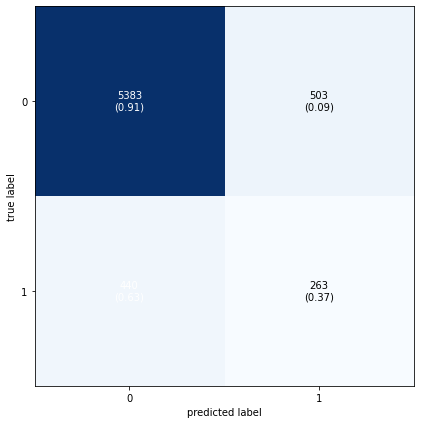

In [ ]:
# Modelo de Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred=tree_clf.predict(X_test)

print('accuracy_score =',accuracy_score(y_test, y_pred))
print('f1_score =',f1_score(y_test, y_pred))
print('recall_score =',recall_score(y_test, y_pred))
print('precision_score =',precision_score(y_test, y_pred))
print('\n classification_report', classification_report(y_test, y_pred))

matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=True)
plt.tight_layout();
plt.savefig("image6.png", dpi=150, bbox_inches='tight')

Ahora utilizamos el metodo **Decision Tree**, obteniendo un score de 86%, inferior en 0.04 puntos porcentuales.

### 3.3 **Modelo por Random Forest**

accuracy_score = 0.882986796175444
f1_score = 0.40555127216653813
recall_score = 0.3741109530583215
precision_score = 0.44276094276094274

 classification_report               precision    recall  f1-score   support

           0       0.93      0.94      0.94      5886
           1       0.44      0.37      0.41       703

    accuracy                           0.88      6589
   macro avg       0.68      0.66      0.67      6589
weighted avg       0.87      0.88      0.88      6589



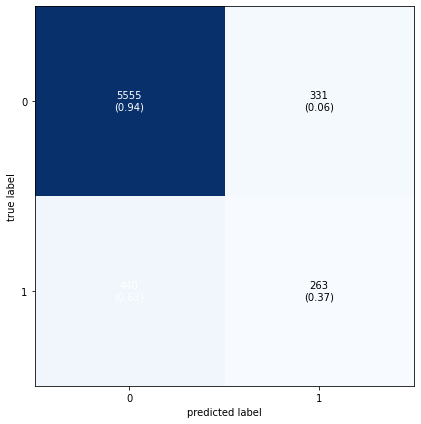

In [ ]:
# Modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred=rf_clf.predict(X_test)

print('accuracy_score =',accuracy_score(y_test, y_pred))
print('f1_score =',f1_score(y_test, y_pred))
print('recall_score =',recall_score(y_test, y_pred))
print('precision_score =',precision_score(y_test, y_pred))
print('\n classification_report', classification_report(y_test, y_pred))

matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=True)
plt.tight_layout();
plt.savefig("image7.png", dpi=150, bbox_inches='tight')

Ahora utilizamos el metodo **Random Forest**, obteniendo un score de 88%, inferior en 0.02 puntos porcentuales.

## 4. **Conclusiones**

- Del analisis de los datos pudimos reconocer que las variables **Edad, Mes, Estado Civil y Tiempo de ultima llamada con el Cliente** juegan un factor determinante en la probabilidad de que los clientes se subscriban o no a un deposito a plazo. Siendo las siguientes las condiciones optimas:

  - Edad:18-25 y 60-100 
  - Mes: Marzo, Septiembre, Octubre y Diciembre 
  - Estado Civil: Soltero
  - Tiempo de ultima llamada con el Cliente: 12min

- Los modelos implementados lograron predecir el comportamiento observado en los datos con una precision mayor al 86%, siendo el modelo de **Regresion Logistica** aquel con mayor presición, de un **91%**.

- Proponemos utilizar el algoritmo de regresión logística en la base de datos de bancos para seleccionar a los propectos a los cuales se le contactará mediante una campaña telefónica exclusiva, eficientizando el tiempo y el esfuerzo del call center.